## Flight Delay Analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

pd.set_option("display.max_columns", None)

In [2]:
# getting the data to the development environment from kaggle 

import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickzel/flight-delay-and-cancellation-dataset-2019-2023")

print("Path to dataset files:", path)

Path to dataset files: /teamspace/studios/this_studio/.cache/kagglehub/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023/versions/7


In [3]:
flight_df = pd.read_csv("/teamspace/studios/this_studio/.cache/kagglehub/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023/versions/7/flights_sample_3m.csv")
flight_df.head(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",1010,1237.0,147.0,15.0,1252.0,1328.0,3.0,1110,1331.0,141.0,0.0,NaN,0.0,60.0,54.0,36.0,181.0,141.0,0.0,0.0,0.0,0.0
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001.0,-9.0,23.0,1024.0,1122.0,8.0,1159,1130.0,-29.0,0.0,NaN,0.0,109.0,89.0,58.0,399.0,NaN,NaN,NaN,NaN,NaN
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",1643,1637.0,-6.0,22.0,1659.0,1927.0,41.0,1945,2008.0,23.0,0.0,NaN,0.0,122.0,151.0,88.0,613.0,0.0,0.0,23.0,0.0,0.0
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527.0,-3.0,11.0,538.0,658.0,8.0,717,706.0,-11.0,0.0,NaN,0.0,227.0,219.0,200.0,1379.0,NaN,NaN,NaN,NaN,NaN
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",2125,2116.0,-9.0,19.0,2135.0,2353.0,3.0,2355,2356.0,1.0,0.0,NaN,0.0,210.0,220.0,198.0,1533.0,NaN,NaN,NaN,NaN,NaN


In [4]:
flight_df.sample(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
109598,2019-12-15,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2637,SEA,"Seattle, WA",LAS,"Las Vegas, NV",1850,1844.0,-6.0,47.0,1931.0,2117.0,10.0,2112,2127.0,15.0,0.0,NaN,0.0,142.0,163.0,106.0,867.0,0.0,0.0,15.0,0.0,0.0
2196298,2023-05-31,Republic Airline,Republic Airline: YX,YX,20452,4585,BOS,"Boston, MA",IND,"Indianapolis, IN",1745,1736.0,-9.0,20.0,1756.0,1945.0,8.0,2023,1953.0,-30.0,0.0,NaN,0.0,158.0,137.0,109.0,818.0,NaN,NaN,NaN,NaN,NaN
1639713,2022-10-31,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3314,SJC,"San Jose, CA",PDX,"Portland, OR",1600,1550.0,-10.0,11.0,1601.0,1724.0,6.0,1748,1730.0,-18.0,0.0,NaN,0.0,108.0,100.0,83.0,569.0,NaN,NaN,NaN,NaN,NaN
1967547,2019-01-23,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2401,DFW,"Dallas/Fort Worth, TX",TPA,"Tampa, FL",1915,1910.0,-5.0,20.0,1930.0,2237.0,5.0,2238,2242.0,4.0,0.0,NaN,0.0,143.0,152.0,127.0,929.0,NaN,NaN,NaN,NaN,NaN
1446729,2019-06-10,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,41,HOU,"Houston, TX",DEN,"Denver, CO",1835,1838.0,3.0,8.0,1846.0,1953.0,5.0,2015,1958.0,-17.0,0.0,NaN,0.0,160.0,140.0,127.0,883.0,NaN,NaN,NaN,NaN,NaN
467151,2019-05-24,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,34,HOU,"Houston, TX",DAL,"Dallas, TX",1430,1520.0,50.0,7.0,1527.0,1608.0,4.0,1540,1612.0,32.0,0.0,NaN,0.0,70.0,52.0,41.0,239.0,22.0,0.0,0.0,0.0,10.0
2831965,2023-01-19,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,487,BWI,"Baltimore, MD",PBI,"West Palm Beach/Palm Beach, FL",835,843.0,8.0,16.0,859.0,1111.0,4.0,1125,1115.0,-10.0,0.0,NaN,0.0,170.0,152.0,132.0,883.0,NaN,NaN,NaN,NaN,NaN
1067016,2019-02-02,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3661,SLC,"Salt Lake City, UT",FCA,"Kalispell, MT",1115,1124.0,9.0,22.0,1146.0,1303.0,5.0,1319,1308.0,-11.0,0.0,NaN,0.0,124.0,104.0,77.0,531.0,NaN,NaN,NaN,NaN,NaN
2477621,2021-08-15,Mesa Airlines Inc.,Mesa Airlines Inc.: YV,YV,20378,6277,ORF,"Norfolk, VA",IAH,"Houston, TX",900,900.0,0.0,20.0,920.0,1054.0,7.0,1110,1101.0,-9.0,0.0,NaN,0.0,190.0,181.0,154.0,1201.0,NaN,NaN,NaN,NaN,NaN
2465554,2019-06-28,ExpressJet Airlines LLC d/b/a aha!,ExpressJet Airlines LLC d/b/a aha!: EV,EV,20366,4403,LIT,"Little Rock, AR",IAH,"Houston, TX",710,705.0,-5.0,16.0,721.0,825.0,13.0,840,838.0,-2.0,0.0,NaN,0.0,90.0,93.0,64.0,374.0,NaN,NaN,NaN,NaN,NaN


In [5]:
flight_df.tail(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
2999990,2023-07-26,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,4126,DTW,"Detroit, MI",MSN,"Madison, WI",825,824.0,-1.0,32.0,856.0,851.0,5.0,843,856.0,13.0,0.0,NaN,0.0,78.0,92.0,55.0,311.0,NaN,NaN,NaN,NaN,NaN
2999991,2021-12-03,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1146,MSP,"Minneapolis, MN",SNA,"Santa Ana, CA",1825,1833.0,8.0,23.0,1856.0,2015.0,7.0,2030,2022.0,-8.0,0.0,NaN,0.0,245.0,229.0,199.0,1522.0,NaN,NaN,NaN,NaN,NaN
2999992,2019-01-13,JetBlue Airways,JetBlue Airways: B6,B6,20409,1668,CHS,"Charleston, SC",BOS,"Boston, MA",1258,1245.0,-13.0,15.0,1300.0,1438.0,4.0,1510,1442.0,-28.0,0.0,NaN,0.0,132.0,117.0,98.0,818.0,NaN,NaN,NaN,NaN,NaN
2999993,2019-12-23,Allegiant Air,Allegiant Air: G4,G4,20368,1899,SRQ,"Sarasota/Bradenton, FL",IND,"Indianapolis, IN",907,905.0,-2.0,11.0,916.0,1106.0,9.0,1125,1115.0,-10.0,0.0,NaN,0.0,138.0,130.0,110.0,876.0,NaN,NaN,NaN,NaN,NaN
2999994,2020-08-31,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1408,FLL,"Fort Lauderdale, FL",LGA,"New York, NY",700,653.0,-7.0,16.0,709.0,927.0,6.0,944,933.0,-11.0,0.0,NaN,0.0,164.0,160.0,138.0,1076.0,NaN,NaN,NaN,NaN,NaN
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",1742,1740.0,-2.0,10.0,1750.0,1845.0,6.0,1907,1851.0,-16.0,0.0,NaN,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",1300,1254.0,-6.0,10.0,1304.0,1514.0,5.0,1556,1519.0,-37.0,0.0,NaN,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",534,615.0,41.0,16.0,631.0,759.0,6.0,729,805.0,36.0,0.0,NaN,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",1600,1555.0,-5.0,19.0,1614.0,1704.0,8.0,1728,1712.0,-16.0,0.0,NaN,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN
2999999,2019-06-15,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2823,LGB,"Long Beach, CA",SJC,"San Jose, CA",730,727.0,-3.0,9.0,736.0,828.0,2.0,840,830.0,-10.0,0.0,NaN,0.0,70.0,63.0,52.0,324.0,NaN,NaN,NaN,NaN,NaN


In [6]:
flight_df.shape

(3000000, 32)

In [7]:
flight_df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [8]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

### Data Cleaning and Wrangling

#### 1. Checking for completeness

In [9]:
# calculating percentages of missing values
 
def missing_values_percentages(df: pd.DataFrame):
    missing_percent = (df.isna().sum() /len(df)) * 100
    missing_df = pd.DataFrame({'Column': df.columns, "Missing (%)": missing_percent})
    missing_df = missing_df[missing_df["Missing (%)"] > 0].sort_values(by='Missing (%)', ascending=False)
    return missing_df


In [10]:
missing_values_percentages(flight_df)

,Column,Missing (%)
CANCELLATION_CODE,CANCELLATION_CODE,97.362000
DELAY_DUE_WEATHER,DELAY_DUE_WEATHER,82.204567
DELAY_DUE_NAS,DELAY_DUE_NAS,82.204567
DELAY_DUE_SECURITY,DELAY_DUE_SECURITY,82.204567
DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_LATE_AIRCRAFT,82.204567
DELAY_DUE_CARRIER,DELAY_DUE_CARRIER,82.204567
AIR_TIME,AIR_TIME,2.873267
ELAPSED_TIME,ELAPSED_TIME,2.873267
ARR_DELAY,ARR_DELAY,2.873267
TAXI_IN,TAXI_IN,2.664800


In [11]:
# dealing with missing values 

# Replace missing delay causes with 0 as absence of data implies no delay due to that cause

delay_columns = [
        'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
        'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'
    ]

flight_df[delay_columns] = flight_df[delay_columns].fillna(0)

In [12]:
# Impute CRS_ELAPSED_TIME with median

flight_df['CRS_ELAPSED_TIME'] = flight_df['CRS_ELAPSED_TIME'].fillna(flight_df['CRS_ELAPSED_TIME'].median())

In [13]:
# Impute ELAPSED_TIME and AIR_TIME for non-canceled flights with group median

flight_df['ELAPSED_TIME'] = flight_df.groupby('AIRLINE_CODE')['ELAPSED_TIME'].transform(lambda x: x.fillna(x.median()))
flight_df['AIR_TIME'] = flight_df.groupby('AIRLINE_CODE')['AIR_TIME'].transform(lambda x: x.fillna(x.median()))

In [17]:
# Impute ARR_DELAY for non-canceled flights
flight_df['ARR_DELAY'] = flight_df.groupby('AIRLINE_CODE')['ARR_DELAY'].transform(lambda x: x.fillna(x.median()))

# Impute WHEELS_ON and TAXI_IN
flight_df['WHEELS_ON'] = flight_df['WHEELS_ON'].fillna(flight_df['CRS_ARR_TIME'] - flight_df['TAXI_IN'].median())
flight_df['TAXI_IN'] = flight_df['TAXI_IN'].fillna(flight_df['TAXI_IN'].median())

# Impute ARR_TIME
flight_df['ARR_TIME'] = flight_df['ARR_TIME'].fillna(flight_df['WHEELS_ON'] + flight_df['TAXI_IN'].median())

# Impute TAXI_OUT and WHEELS_OFF
flight_df['TAXI_OUT'] = flight_df.groupby('ORIGIN')['TAXI_OUT'].transform(lambda x: x.fillna(x.median()))
flight_df['WHEELS_OFF'] = flight_df['WHEELS_OFF'].fillna(flight_df['DEP_TIME'] + flight_df['TAXI_OUT'].median())

# Impute DEP_DELAY and DEP_TIME
flight_df['DEP_DELAY'] = flight_df.groupby('AIRLINE_CODE')['DEP_DELAY'].transform(lambda x: x.fillna(x.median()))
flight_df['DEP_TIME'] = flight_df["DEP_TIME"].fillna(flight_df['CRS_DEP_TIME'] + flight_df['DEP_DELAY'])

In [15]:
# Drop CANCELLATION_CODE as our focus is on delay analysis and the column is missing 97% of its values

flight_df = flight_df.drop(columns=['CANCELLATION_CODE'], errors='ignore')

In [18]:
missing_values_percentages(flight_df)

,Column,Missing (%)


In [19]:
flight_df.isna().sum()

FL_DATE                    0
AIRLINE                    0
AIRLINE_DOT                0
AIRLINE_CODE               0
DOT_CODE                   0
FL_NUMBER                  0
ORIGIN                     0
ORIGIN_CITY                0
DEST                       0
DEST_CITY                  0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_TIME                   0
ARR_DELAY                  0
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
dtype: int64

#### 2. Checking for consistency

In [20]:
# checking for duplicated values 
flight_df.duplicated().sum()

0

The Dataset contains no duplicated values

#### 3. Checking for Uniformity

In [21]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  DIVERTED

In [22]:
# Handling uniformity of data types 
# Convert FL_DATE to datetime
flight_df['FL_DATE'] = pd.to_datetime(flight_df['FL_DATE'], format='%Y-%m-%d')

In [23]:
# Convert object columns to category
categorical_columns = ['AIRLINE', 'AIRLINE_CODE', 'AIRLINE_DOT','ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY']
for col in categorical_columns:
    flight_df[col] = flight_df[col].astype('category')

In [24]:
# Convert time-related columns to four-digit integers (hhmm)
time_columns = ['CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME']
for col in time_columns:
    flight_df[col] = flight_df[col].astype('Int64') 

In [25]:
# Convert binary flags to boolean
flight_df['CANCELLED'] = flight_df['CANCELLED'].astype(bool)
flight_df['DIVERTED'] = flight_df['DIVERTED'].astype(bool)

In [26]:
# Convert all column names to lowercase
flight_df.columns = flight_df.columns.str.lower()

In [27]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 31 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   fl_date                  datetime64[ns]
 1   airline                  category      
 2   airline_dot              category      
 3   airline_code             category      
 4   dot_code                 int64         
 5   fl_number                int64         
 6   origin                   category      
 7   origin_city              category      
 8   dest                     category      
 9   dest_city                category      
 10  crs_dep_time             Int64         
 11  dep_time                 Int64         
 12  dep_delay                float64       
 13  taxi_out                 float64       
 14  wheels_off               Int64         
 15  wheels_on                Int64         
 16  taxi_in                  float64       
 17  crs_arr_time             In

In [28]:
flight_df_cleaned = flight_df
flight_df_cleaned.head(10) 

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151,-4.0,19.0,1210,1443,4.0,1501,1447,-14.0,False,False,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114,-6.0,9.0,2123,2232,38.0,2315,2310,-5.0,False,False,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000,6.0,20.0,1020,1247,5.0,1252,1252,0.0,False,False,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608,-1.0,27.0,1635,1844,9.0,1829,1853,24.0,False,False,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838,-2.0,15.0,1853,2026,14.0,2041,2040,-1.0,False,False,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",1010,1237,147.0,15.0,1252,1328,3.0,1110,1331,141.0,False,False,60.0,54.0,36.0,181.0,141.0,0.0,0.0,0.0,0.0
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001,-9.0,23.0,1024,1122,8.0,1159,1130,-29.0,False,False,109.0,89.0,58.0,399.0,0.0,0.0,0.0,0.0,0.0
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",1643,1637,-6.0,22.0,1659,1927,41.0,1945,2008,23.0,False,False,122.0,151.0,88.0,613.0,0.0,0.0,23.0,0.0,0.0
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527,-3.0,11.0,538,658,8.0,717,706,-11.0,False,False,227.0,219.0,200.0,1379.0,0.0,0.0,0.0,0.0,0.0
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",2125,2116,-9.0,19.0,2135,2353,3.0,2355,2356,1.0,False,False,210.0,220.0,198.0,1533.0,0.0,0.0,0.0,0.0,0.0


In [29]:
pd.Series(flight_df_cleaned.delay_due_carrier.value_counts())

delay_due_carrier
0.0       2703049
15.0         9102
1.0          9073
2.0          8941
3.0          8670
           ...   
899.0           1
963.0           1
2000.0          1
2934.0          1
1531.0          1
Name: count, Length: 1291, dtype: int64

#### 4. Checking for Validity

In [30]:
flight_df.describe()

,fl_date,dot_code,fl_number,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft
count,3000000,3.000000e+06,3.000000e+06,3000000.0,3000000.0,3.000000e+06,3.000000e+06,3000000.0,3000000.0,3.000000e+06,3000000.0,3000000.0,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06
mean,2021-05-07 18:03:59.616002048,1.997629e+04,2.511536e+03,1327.061984,1330.504598,9.806089e+00,1.658907e+01,1352.930187,1463.662891,7.634241e+00,1490.560665,1467.727691,3.954262e+00,1.422757e+02,1.362084e+02,1.119000e+02,8.093616e+02,4.405987e+00,7.091943e-01,2.342720e+00,2.596900e-02,4.532725e+00
min,2019-01-01 00:00:00,1.939300e+04,1.000000e+00,1.0,1.0,-9.000000e+01,1.000000e+00,1.0,-5.0,1.000000e+00,1.0,1.0,-9.600000e+01,1.000000e+00,1.500000e+01,8.000000e+00,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2019-12-28 00:00:00,1.979000e+04,1.051000e+03,915.0,916.0,-6.000000e+00,1.100000e+01,931.0,1049.0,4.000000e+00,1107.0,1053.0,-1.500000e+01,9.000000e+01,8.500000e+01,6.200000e+01,3.770000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2021-06-28 00:00:00,1.993000e+04,2.152000e+03,1320.0,1323.0,-2.000000e+00,1.400000e+01,1336.0,1502.0,6.000000e+00,1516.0,1506.0,-7.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2022-08-02 00:00:00,2.036800e+04,3.797000e+03,1730.0,1739.0,6.000000e+00,1.900000e+01,1753.0,1909.0,9.000000e+00,1919.0,1914.0,6.000000e+00,1.720000e+02,1.660000e+02,1.410000e+02,1.046000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2023-08-31 00:00:00,2.045200e+04,9.562000e+03,2359.0,2400.0,2.966000e+03,1.840000e+02,2400.0,2400.0,2.490000e+02,2400.0,2400.0,2.934000e+03,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2.934000e+03,1.653000e+03,1.741000e+03,1.185000e+03,2.557000e+03
std,NaN,3.772846e+02,1.747258e+03,485.878854,499.339192,4.864984e+01,9.089883e+00,500.860552,527.438747,6.191446e+00,511.547566,531.920805,5.046670e+01,7.155653e+01,7.082580e+01,6.892730e+01,5.878939e+02,3.172305e+01,1.375707e+01,1.486748e+01,1.512105e+00,2.546245e+01


In [31]:
def check_outliers(df):
    # List to store outlier details for each column
    outlier_data = []

    # Loop through numeric columns
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # Compute Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Compute outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_percentage = (outlier_count / df.shape[0]) * 100

        # Append details to the list
        outlier_data.append({
            'column': col,
            'outlier_count': outlier_count,
            'outlier_percentage': outlier_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        })

    # Convert list to DataFrame
    outlier_df = pd.DataFrame(outlier_data)
    return outlier_df

In [32]:
# Apply the function
check_outliers(flight_df_cleaned)

,column,outlier_count,outlier_percentage,lower_bound,upper_bound
0,dot_code,0,0.000000,18923.0,21235.0
1,fl_number,140,0.004667,-3068.0,7916.0
2,crs_dep_time,0,0.000000,-307.5,2952.5
3,dep_time,0,0.000000,-318.5,2973.5
4,dep_delay,392850,13.095000,-24.0,24.0
5,taxi_out,166368,5.545600,-1.0,31.0
6,wheels_off,0,0.000000,-302.0,2986.0
7,wheels_on,0,0.000000,-241.0,3199.0
8,taxi_in,179309,5.976967,-3.5,16.5
9,crs_arr_time,0,0.000000,-111.0,3137.0


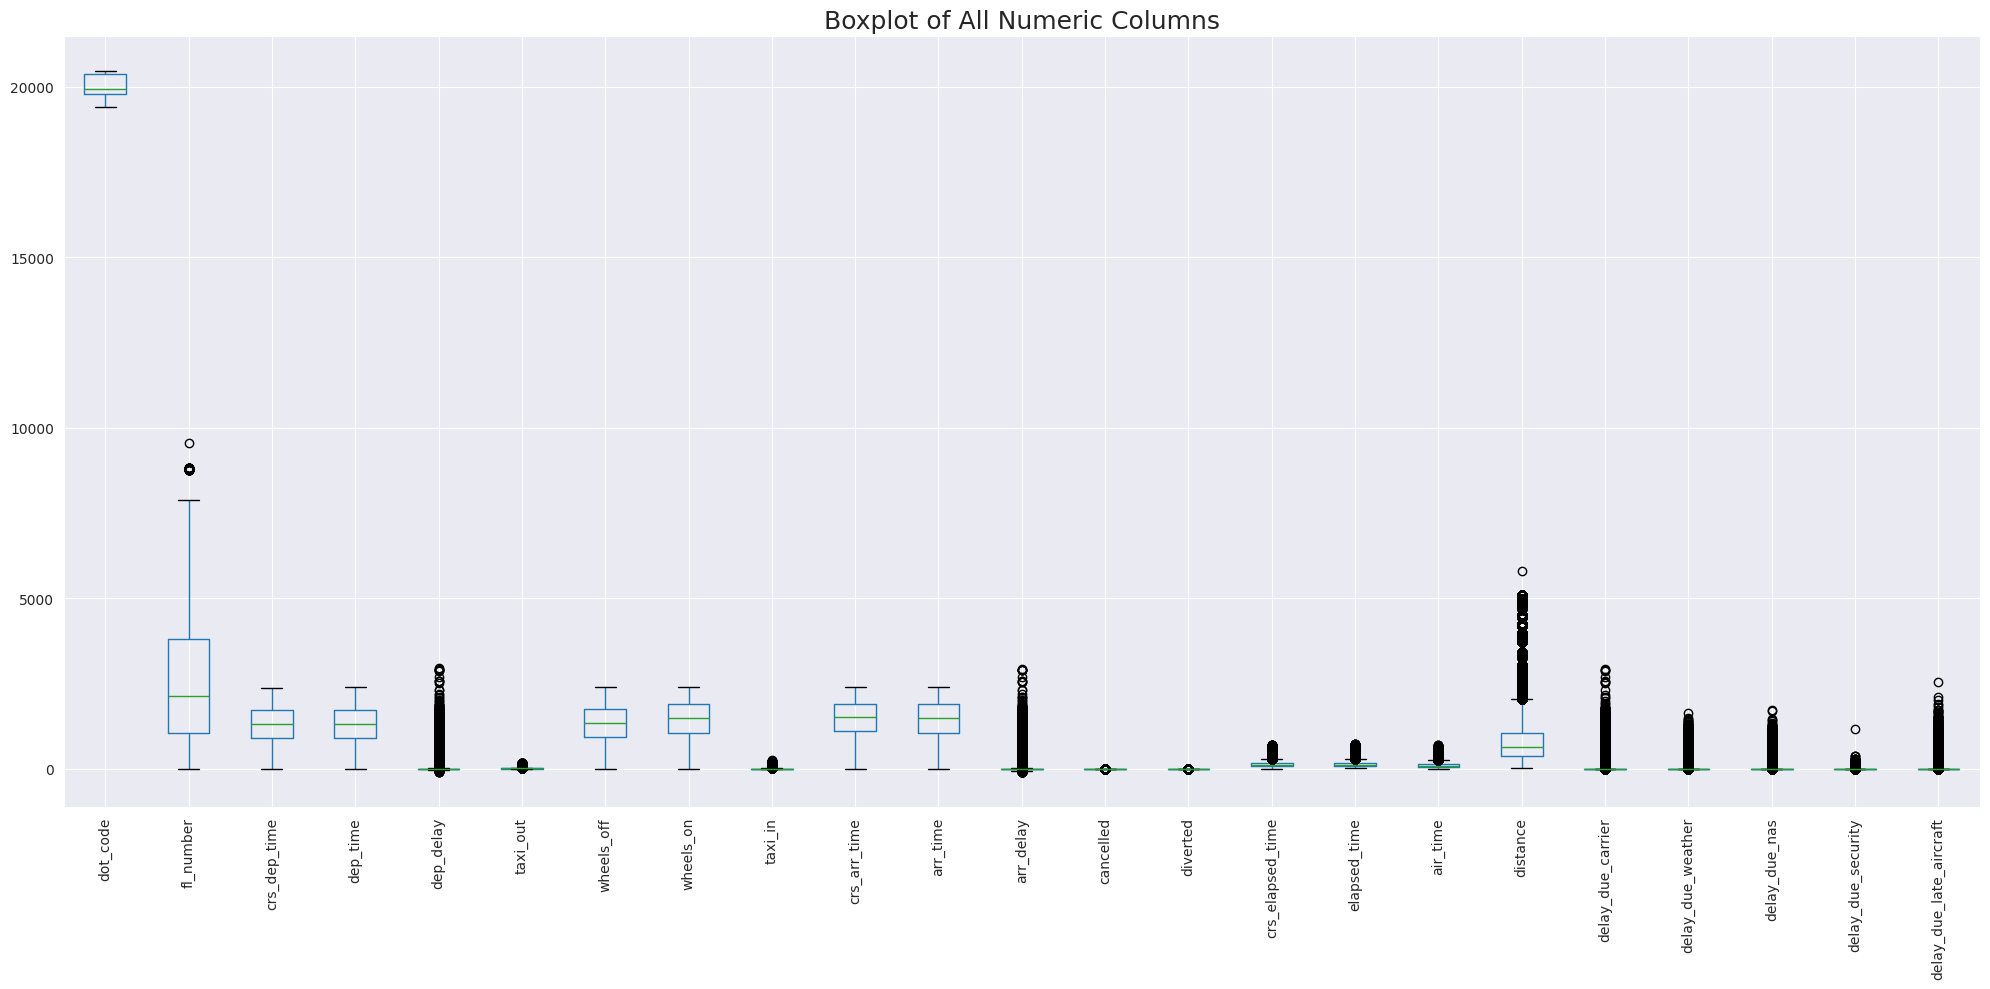

In [33]:
plt.figure(figsize=(20, 10))

flight_df.boxplot()

plt.title("Boxplot of All Numeric Columns", fontsize=18)
plt.xticks(rotation=90, fontsize=10)  
plt.grid(True)  
plt.tight_layout() 

plt.show()

In [34]:
def remove_outliers(df: pd.DataFrame):
    # Create a copy of the dataframe to avoid modifying the original
    df_no_outliers = df.copy()

    # Loop through each column to calculate IQR and detect outliers
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with NaN
        df_no_outliers[column] = df[column].apply(
            lambda x: np.nan if (pd.notna(x) and (x < lower_bound or x > upper_bound)) else x
        )

    return df_no_outliers

In [35]:
# Apply the function to remove outliers
flight_df_cleaned = remove_outliers(flight_df_cleaned)
flight_df_cleaned.head(10)

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562.0,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151,-4.0,19.0,1210,1443,4.0,1501,1447,-14.0,False,False,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149.0,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114,-6.0,9.0,2123,2232,NaN,2315,2310,-5.0,False,False,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459.0,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000,6.0,20.0,1020,1247,5.0,1252,1252,0.0,False,False,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295.0,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608,-1.0,27.0,1635,1844,9.0,1829,1853,24.0,False,False,260.0,285.0,249.0,1589.0,0.0,0.0,NaN,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407.0,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838,-2.0,15.0,1853,2026,14.0,2041,2040,-1.0,False,False,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665.0,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",1010,1237,NaN,15.0,1252,1328,3.0,1110,1331,NaN,False,False,60.0,54.0,36.0,181.0,NaN,0.0,0.0,0.0,0.0
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134.0,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001,-9.0,23.0,1024,1122,8.0,1159,1130,-29.0,False,False,109.0,89.0,58.0,399.0,0.0,0.0,0.0,0.0,0.0
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464.0,HSV,"Huntsville, AL",DCA,"Washington, DC",1643,1637,-6.0,22.0,1659,1927,NaN,1945,2008,23.0,False,False,122.0,151.0,88.0,613.0,0.0,0.0,NaN,0.0,0.0
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590.0,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527,-3.0,11.0,538,658,8.0,717,706,-11.0,False,False,227.0,219.0,200.0,1379.0,0.0,0.0,0.0,0.0,0.0
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223.0,SEA,"Seattle, WA",FAI,"Fairbanks, AK",2125,2116,-9.0,19.0,2135,2353,3.0,2355,2356,1.0,False,False,210.0,220.0,198.0,1533.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# checking for missing values due to removal of outliers 
flight_df.isna().sum() 

fl_date                    0
airline                    0
airline_dot                0
airline_code               0
dot_code                   0
fl_number                  0
origin                     0
origin_city                0
dest                       0
dest_city                  0
crs_dep_time               0
dep_time                   0
dep_delay                  0
taxi_out                   0
wheels_off                 0
wheels_on                  0
taxi_in                    0
crs_arr_time               0
arr_time                   0
arr_delay                  0
cancelled                  0
diverted                   0
crs_elapsed_time           0
elapsed_time               0
air_time                   0
distance                   0
delay_due_carrier          0
delay_due_weather          0
delay_due_nas              0
delay_due_security         0
delay_due_late_aircraft    0
dtype: int64

In [37]:
missing_values_percentages(flight_df)

,Column,Missing (%)


In [38]:
# dropping the null values 
flight_df_cleaned = flight_df_cleaned.dropna(how='any')

In [39]:
flight_df.columns

Index(['fl_date', 'airline', 'airline_dot', 'airline_code', 'dot_code',
       'fl_number', 'origin', 'origin_city', 'dest', 'dest_city',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time',
       'distance', 'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
       'delay_due_security', 'delay_due_late_aircraft'],
      dtype='object')

In [40]:
# Create a delay column: True if delayed, False otherwise

flight_df['target'] = (flight_df['arr_delay'] > 0) | (flight_df['dep_delay'] > 0)

In [41]:
flight_df.delay_due_carrier.value_counts()

delay_due_carrier
0.0       2703049
15.0         9102
1.0          9073
2.0          8941
3.0          8670
           ...   
899.0           1
963.0           1
2000.0          1
2934.0          1
1531.0          1
Name: count, Length: 1291, dtype: int64

In [42]:
flight_df.head()

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151,-4.0,19.0,1210,1443,4.0,1501,1447,-14.0,False,False,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,False
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114,-6.0,9.0,2123,2232,38.0,2315,2310,-5.0,False,False,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0,False
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000,6.0,20.0,1020,1247,5.0,1252,1252,0.0,False,False,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,True
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608,-1.0,27.0,1635,1844,9.0,1829,1853,24.0,False,False,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,True
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838,-2.0,15.0,1853,2026,14.0,2041,2040,-1.0,False,False,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,False


In [43]:
flight_df.shape

(3000000, 32)

In [44]:
# Save the cleaned dataset (without outliers) to a CSV file

flight_df.to_csv('../data/cleaned_flight_data.csv', index=False)

In [45]:
%pwd

'/teamspace/studios/this_studio/Flight_delay_analysis/notebooks'

### Data Preparation

#### 1. Dealing with categorical data

In [46]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   fl_date                  datetime64[ns]
 1   airline                  category      
 2   airline_dot              category      
 3   airline_code             category      
 4   dot_code                 int64         
 5   fl_number                int64         
 6   origin                   category      
 7   origin_city              category      
 8   dest                     category      
 9   dest_city                category      
 10  crs_dep_time             Int64         
 11  dep_time                 Int64         
 12  dep_delay                float64       
 13  taxi_out                 float64       
 14  wheels_off               Int64         
 15  wheels_on                Int64         
 16  taxi_in                  float64       
 17  crs_arr_time             In

In [47]:
def preprocess_date_column(df: pd.DataFrame, date_column: str):
    
    df = df.copy()
    # Convert datetime to datetime object
    df[date_column] = pd.to_datetime(df[date_column])

    # Check if the date_column exists in the DataFrame columns
    if date_column not in df.columns:
        raise KeyError(f"Column '{date_column}' not found in the DataFrame columns")

    # Extract day, month, hour, and day of the week
    df['day'] = df[date_column].dt.day
    df['month'] = df[date_column].dt.month
    df['day_of_week'] = df[date_column].dt.dayofweek
    df['year'] = df[date_column].dt.year

    # Drop original datetime column
    df = df.drop(columns=[date_column])

    return df

In [48]:
preprocessed_date_flight_df = preprocess_date_column(flight_df, "fl_date")
preprocessed_date_flight_df.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target,day,month,day_of_week,year
0,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151,-4.0,19.0,1210,1443,4.0,1501,1447,-14.0,False,False,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,False,9,1,2,2019
1,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114,-6.0,9.0,2123,2232,38.0,2315,2310,-5.0,False,False,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0,False,19,11,5,2022
2,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000,6.0,20.0,1020,1247,5.0,1252,1252,0.0,False,False,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,True,22,7,4,2022
3,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608,-1.0,27.0,1635,1844,9.0,1829,1853,24.0,False,False,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,True,6,3,0,2023
4,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838,-2.0,15.0,1853,2026,14.0,2041,2040,-1.0,False,False,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,False,23,2,6,2020
5,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",1010,1237,147.0,15.0,1252,1328,3.0,1110,1331,141.0,False,False,60.0,54.0,36.0,181.0,141.0,0.0,0.0,0.0,0.0,True,31,7,2,2019
6,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",1010,1001,-9.0,23.0,1024,1122,8.0,1159,1130,-29.0,False,False,109.0,89.0,58.0,399.0,0.0,0.0,0.0,0.0,0.0,False,11,6,6,2023
7,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",1643,1637,-6.0,22.0,1659,1927,41.0,1945,2008,23.0,False,False,122.0,151.0,88.0,613.0,0.0,0.0,23.0,0.0,0.0,True,8,7,0,2019
8,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",530,527,-3.0,11.0,538,658,8.0,717,706,-11.0,False,False,227.0,219.0,200.0,1379.0,0.0,0.0,0.0,0.0,0.0,False,12,2,6,2023
9,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",2125,2116,-9.0,19.0,2135,2353,3.0,2355,2356,1.0,False,False,210.0,220.0,198.0,1533.0,0.0,0.0,0.0,0.0,0.0,True,22,8,5,2020


In [49]:
preprocessed_date_flight_df.shape

(3000000, 35)

In [50]:
preprocessed_date_flight_df.columns

Index(['airline', 'airline_dot', 'airline_code', 'dot_code', 'fl_number',
       'origin', 'origin_city', 'dest', 'dest_city', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time', 'distance',
       'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
       'delay_due_security', 'delay_due_late_aircraft', 'target', 'day',
       'month', 'day_of_week', 'year'],
      dtype='object')

In [51]:
preprocessed_date_flight_df['year'].value_counts()

year
2019    757673
2022    687860
2021    611633
2020    479350
2023    463484
Name: count, dtype: int64

In [52]:
preprocessed_date_flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 35 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   airline                  category
 1   airline_dot              category
 2   airline_code             category
 3   dot_code                 int64   
 4   fl_number                int64   
 5   origin                   category
 6   origin_city              category
 7   dest                     category
 8   dest_city                category
 9   crs_dep_time             Int64   
 10  dep_time                 Int64   
 11  dep_delay                float64 
 12  taxi_out                 float64 
 13  wheels_off               Int64   
 14  wheels_on                Int64   
 15  taxi_in                  float64 
 16  crs_arr_time             Int64   
 17  arr_time                 Int64   
 18  arr_delay                float64 
 19  cancelled                bool    
 20  diverted                

In [55]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df: pd.DataFrame, encoding_type: str = 'label') -> tuple:
    """
    Encodes categorical columns in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame with categorical columns.
        encoding_type (str): The encoding type, either 'label' or 'onehot'.

    Returns:
        tuple: (encoded DataFrame, dictionary of encoders)
    """
    df_encoded = df.copy()
    categorical_columns = df_encoded.select_dtypes(include=['category']).columns
    encoders_dict = {}

    if encoding_type == 'label':
        for col in categorical_columns:
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col])
            encoders_dict[col] = le

    elif encoding_type == 'onehot':
        df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)
    else:
        raise ValueError("Unsupported encoding_type. Use 'label' or 'onehot'.")

    return df_encoded, encoders_dict

In [56]:
#Encode using label encoding
flight_df_encoded, cat_encoders = encode_categorical_columns(preprocessed_date_flight_df, encoding_type='label')
flight_df_encoded.head(10)

# save the encoder used 
import joblib
joblib.dump(cat_encoders, '../model_utils/label_encoders.joblib')

['../model_utils/label_encoders.joblib']

In [57]:
flight_df_encoded.target.value_counts()

target
False    1738199
True     1261801
Name: count, dtype: int64

In [58]:
flight_df_encoded['year'].value_counts()

year
2019    757673
2022    687860
2021    611633
2020    479350
2023    463484
Name: count, dtype: int64

In [59]:
# flight data target column analysis 
#flight_df_encoded.target.dtype()

In [60]:
flight_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 35 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   airline                  int64  
 1   airline_dot              int64  
 2   airline_code             int64  
 3   dot_code                 int64  
 4   fl_number                int64  
 5   origin                   int64  
 6   origin_city              int64  
 7   dest                     int64  
 8   dest_city                int64  
 9   crs_dep_time             Int64  
 10  dep_time                 Int64  
 11  dep_delay                float64
 12  taxi_out                 float64
 13  wheels_off               Int64  
 14  wheels_on                Int64  
 15  taxi_in                  float64
 16  crs_arr_time             Int64  
 17  arr_time                 Int64  
 18  arr_delay                float64
 19  cancelled                bool   
 20  diverted                 bool   
 21  crs_elap

#### 2. Scaling Data

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scale_dataset(df: pd.DataFrame, scaling_type: str = 'standard') -> tuple:
    """
    Scales numerical columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        scaling_type (str): The type of scaling to apply, either 'standard' or 'minmax'.

    Returns:
        tuple: (scaled DataFrame, scaler object)
    """
    df_scaled = df.copy()

    # select numeric columns
    numerical_columns = df_scaled.select_dtypes(include=['float64', 'int64']).columns

    if scaling_type == 'standard':
        scaler = StandardScaler()
    elif scaling_type == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Unsupported scaling_type. Use 'standard' or 'minmax'. ")

    df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

    return df_scaled, scaler

In [63]:
# Apply standard scaling
scaled_flight_df, scaler = scale_dataset(flight_df_encoded, scaling_type='standard')
scaled_flight_df.head(10)

# save the scaler
import joblib
joblib.dump(scaler, '../model_utils/data_scaler.joblib')

['../model_utils/data_scaler.joblib']

In [64]:
scaled_flight_df.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target,day,month,day_of_week,year
0,1.286792,1.286792,0.884229,0.001871,-0.543443,-0.528480,-0.554247,-0.606505,0.605839,-0.354125,-0.359484,-0.283785,0.265232,-0.285369,-0.039176,-0.586978,0.020407,-0.038968,-0.355765,False,False,0.611045,0.561823,0.596281,0.434838,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,False,9,1,2,2019
1,-1.101954,-1.101954,-0.874146,-0.493776,-0.779814,0.609352,0.415701,1.353425,1.346862,1.631967,1.569065,-0.324895,-0.834893,1.537494,1.456733,4.904470,1.611658,1.583455,-0.177429,False,False,1.295819,1.408972,1.118570,1.002968,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,False,19,11,5,2022
2,1.286792,1.286792,0.884229,0.001871,-1.174718,-0.842364,-0.830017,0.608652,0.415833,-0.767809,-0.661884,-0.078234,0.375244,-0.664716,-0.410783,-0.425465,-0.466351,-0.405564,-0.078354,False,False,-0.339252,-0.341802,-0.361250,-0.220042,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,True,22,7,4,2022
3,-1.101954,-1.101954,-0.874146,-0.493776,-0.123929,0.609352,0.415701,1.373025,1.204357,0.580264,0.555725,-0.222120,1.145331,0.563170,0.721102,0.220588,0.661599,0.724304,0.397207,False,False,1.645193,2.100811,1.989053,1.326155,-0.138889,-0.051551,1.456688,-0.017174,-0.178016,True,6,3,0,2023
4,1.116167,1.116167,0.180879,1.165449,-1.204479,0.373938,0.739017,-0.831897,-0.885707,1.055691,1.016334,-0.242675,-0.174818,0.998421,1.066166,1.028154,1.076028,1.075860,-0.098169,False,False,0.541170,0.646538,0.596281,0.298759,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,False,23,2,6,2020
5,0.945543,0.945543,1.060067,-1.546032,-1.056819,-0.901218,-0.896582,0.706648,0.710342,-0.652554,-0.187257,2.820028,-0.174818,-0.201514,-0.257211,-0.748491,-0.743940,-0.257045,2.715568,False,False,-1.149801,-1.160713,-1.101160,-1.068835,4.305829,-0.051551,-0.157574,-0.017174,-0.178016,True,31,7,2,2019
6,-1.272579,-1.272579,-1.401658,-0.454018,-0.216073,-0.871791,1.689947,-1.331680,-1.284719,-0.652554,-0.659881,-0.386560,0.705282,-0.656730,-0.647777,0.059075,-0.648152,-0.634921,-0.652990,False,False,-0.465027,-0.666543,-0.781983,-0.698020,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,False,11,6,6,2023
7,0.604293,0.604293,1.411742,1.260868,1.117445,-0.175360,-0.202403,-0.871096,1.688872,0.650240,0.613802,-0.324895,0.595269,0.611088,0.878466,5.389010,0.888362,1.015701,0.377392,False,False,-0.283353,0.208845,-0.346742,-0.334009,-0.138889,-0.051551,1.389428,-0.017174,-0.178016,True,8,7,0,2019
8,1.116167,1.116167,0.180879,1.165449,-1.099744,-0.106698,-0.211912,0.157868,0.244828,-1.640454,-1.609136,-0.263230,-0.614868,-1.627060,-1.527501,0.059075,-1.512197,-1.432032,-0.296319,False,False,1.184019,1.168947,1.278159,0.968948,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,False,12,2,6,2023
9,-1.613828,-1.613828,-1.225820,-0.122703,-1.309787,1.354827,1.347612,-0.586906,-0.629199,1.642257,1.573070,-0.386560,0.265232,1.561452,1.686143,-0.748491,1.689852,1.669934,-0.058539,False,False,0.946444,1.183066,1.249143,1.230900,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,True,22,8,5,2020


In [65]:
scaled_flight_df.year.value_counts()

year
2019    757673
2022    687860
2021    611633
2020    479350
2023    463484
Name: count, dtype: int64

#### 3. Dealing with Class Imbalance

In [63]:
scaled_flight_df.target.value_counts()

target
False    1738199
True     1261801
Name: count, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE

def balance_with_smote(df: pd.DataFrame, target_column: str):
    """
    Apply SMOTE to balance the dataset.

    Parameters:
        df (pd.DataFrame): Input DataFrame (encoded and scaled).
        target_column (str): Name of the target column.

    Returns:
        X_resampled (pd.DataFrame): Resampled feature set.
        y_resampled (pd.Series): Resampled target column.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]

    smote = SMOTE(random_state=142)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Convert back to DataFrame
    X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    y_resampled = pd.Series(y_resampled, name=target_column)

    return X_resampled, y_resampled

In [65]:
scaled_flight_df.columns

Index(['airline', 'airline_dot', 'airline_code', 'dot_code', 'fl_number',
       'origin', 'origin_city', 'dest', 'dest_city', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time', 'distance',
       'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
       'delay_due_security', 'delay_due_late_aircraft', 'target', 'day',
       'month', 'day_of_week', 'year'],
      dtype='object')

In [66]:
# Balancing the target class 
X_balanced, y_balanced = balance_with_smote(scaled_flight_df, "target")

In [ ]:
# Check class distribution
print("Class distribution after SMOTE:")
print(y_balanced.value_counts())

Class distribution after SMOTE:
target
False    1738199
True     1738199
Name: count, dtype: int64


In [ ]:
# Combine back into a single DataFrame if needed
balanced_flight_df = pd.concat([X_balanced, y_balanced], axis=1)
balanced_flight_df.head(15)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,day,month,day_of_week,year,target
0,1.286792,1.286792,0.884229,0.001871,-0.543443,-0.528480,-0.554247,-0.606505,0.605839,-0.354125,-0.359484,-0.283785,0.265232,-0.285369,-0.039176,-0.586978,0.020407,-0.038968,-0.355765,False,False,0.611045,0.561823,0.596281,0.434838,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,9,1,2,2019,False
1,-1.101954,-1.101954,-0.874146,-0.493776,-0.779814,0.609352,0.415701,1.353425,1.346862,1.631967,1.569065,-0.324895,-0.834893,1.537494,1.456733,4.904470,1.611658,1.583455,-0.177429,False,False,1.295819,1.408972,1.118570,1.002968,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,19,11,5,2022,False
2,1.286792,1.286792,0.884229,0.001871,-1.174718,-0.842364,-0.830017,0.608652,0.415833,-0.767809,-0.661884,-0.078234,0.375244,-0.664716,-0.410783,-0.425465,-0.466351,-0.405564,-0.078354,False,False,-0.339252,-0.341802,-0.361250,-0.220042,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,7,4,2022,True
3,-1.101954,-1.101954,-0.874146,-0.493776,-0.123929,0.609352,0.415701,1.373025,1.204357,0.580264,0.555725,-0.222120,1.145331,0.563170,0.721102,0.220588,0.661599,0.724304,0.397207,False,False,1.645193,2.100811,1.989053,1.326155,-0.138889,-0.051551,1.456688,-0.017174,-0.178016,6,3,0,2023,True
4,1.116167,1.116167,0.180879,1.165449,-1.204479,0.373938,0.739017,-0.831897,-0.885707,1.055691,1.016334,-0.242675,-0.174818,0.998421,1.066166,1.028154,1.076028,1.075860,-0.098169,False,False,0.541170,0.646538,0.596281,0.298759,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,23,2,6,2020,False
5,0.945543,0.945543,1.060067,-1.546032,-1.056819,-0.901218,-0.896582,0.706648,0.710342,-0.652554,-0.187257,2.820028,-0.174818,-0.201514,-0.257211,-0.748491,-0.743940,-0.257045,2.715568,False,False,-1.149801,-1.160713,-1.101160,-1.068835,4.305829,-0.051551,-0.157574,-0.017174,-0.178016,31,7,2,2019,True
6,-1.272579,-1.272579,-1.401658,-0.454018,-0.216073,-0.871791,1.689947,-1.331680,-1.284719,-0.652554,-0.659881,-0.386560,0.705282,-0.656730,-0.647777,0.059075,-0.648152,-0.634921,-0.652990,False,False,-0.465027,-0.666543,-0.781983,-0.698020,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,11,6,6,2023,False
7,0.604293,0.604293,1.411742,1.260868,1.117445,-0.175360,-0.202403,-0.871096,1.688872,0.650240,0.613802,-0.324895,0.595269,0.611088,0.878466,5.389010,0.888362,1.015701,0.377392,False,False,-0.283353,0.208845,-0.346742,-0.334009,-0.138889,-0.051551,1.389428,-0.017174,-0.178016,8,7,0,2019,True
8,1.116167,1.116167,0.180879,1.165449,-1.099744,-0.106698,-0.211912,0.157868,0.244828,-1.640454,-1.609136,-0.263230,-0.614868,-1.627060,-1.527501,0.059075,-1.512197,-1.432032,-0.296319,False,False,1.184019,1.168947,1.278159,0.968948,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,12,2,6,2023,False
9,-1.613828,-1.613828,-1.225820,-0.122703,-1.309787,1.354827,1.347612,-0.586906,-0.629199,1.642257,1.573070,-0.386560,0.265232,1.561452,1.686143,-0.748491,1.689852,1.669934,-0.058539,False,False,0.946444,1.183066,1.249143,1.230900,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,8,5,2020,True


In [ ]:
missing_values_percentages(balanced_flight_df)

,Column,Missing (%)


In [ ]:
balanced_flight_df.target.value_counts()

target
False    1738199
True     1738199
Name: count, dtype: int64

In [ ]:
check_outliers(balanced_flight_df)

,column,outlier_count,outlier_percentage,lower_bound,upper_bound
0,airline,0,0.000000,-4.173199,4.016787
1,airline_dot,0,0.000000,-4.173199,4.016787
2,airline_code,0,0.000000,-3.775464,3.961385
3,dot_code,0,0.000000,-2.783825,3.322972
4,fl_number,150,0.004315,-3.156246,3.036076
5,origin,0,0.000000,-3.291577,3.239656
6,origin_city,0,0.000000,-3.518078,3.472578
7,dest,0,0.000000,-3.355308,3.347655
8,dest_city,0,0.000000,-3.517287,3.474927
9,crs_dep_time,0,0.000000,-3.331205,3.345357


In [ ]:
# removing outliers from the dataset 
flight_df_balanced_preprocessed = remove_outliers(balanced_flight_df)
flight_df_balanced_preprocessed.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,day,month,day_of_week,year,target
0,1.286792,1.286792,0.884229,0.001871,-0.543443,-0.528480,-0.554247,-0.606505,0.605839,-0.354125,-0.359484,-0.283785,0.265232,-0.285369,-0.039176,-0.586978,0.020407,-0.038968,-0.355765,False,False,0.611045,0.561823,0.596281,0.434838,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,9,1,2,2019,False
1,-1.101954,-1.101954,-0.874146,-0.493776,-0.779814,0.609352,0.415701,1.353425,1.346862,1.631967,1.569065,-0.324895,-0.834893,1.537494,1.456733,NaN,1.611658,1.583455,-0.177429,False,False,1.295819,1.408972,1.118570,1.002968,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,19,11,5,2022,False
2,1.286792,1.286792,0.884229,0.001871,-1.174718,-0.842364,-0.830017,0.608652,0.415833,-0.767809,-0.661884,-0.078234,0.375244,-0.664716,-0.410783,-0.425465,-0.466351,-0.405564,-0.078354,False,False,-0.339252,-0.341802,-0.361250,-0.220042,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,7,4,2022,True
3,-1.101954,-1.101954,-0.874146,-0.493776,-0.123929,0.609352,0.415701,1.373025,1.204357,0.580264,0.555725,-0.222120,1.145331,0.563170,0.721102,0.220588,0.661599,0.724304,0.397207,False,False,1.645193,2.100811,1.989053,1.326155,-0.138889,-0.051551,NaN,-0.017174,-0.178016,6,3,0,2023,True
4,1.116167,1.116167,0.180879,1.165449,-1.204479,0.373938,0.739017,-0.831897,-0.885707,1.055691,1.016334,-0.242675,-0.174818,0.998421,1.066166,1.028154,1.076028,1.075860,-0.098169,False,False,0.541170,0.646538,0.596281,0.298759,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,23,2,6,2020,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476393,0.229170,0.229170,0.645039,-0.177565,0.101479,1.354827,1.347612,0.999701,0.906705,0.540932,0.856961,NaN,NaN,0.979072,0.971382,-0.160631,0.569908,0.968038,NaN,False,False,-0.420225,-0.090253,-0.487662,-0.351168,-0.138889,NaN,NaN,-0.017174,-0.178016,20,12,1,2022,True
3476394,-1.272579,-1.272579,-1.401658,-0.454018,-0.827145,-0.607544,-0.911461,0.428224,0.433405,1.475864,1.636325,NaN,0.217629,1.692135,-2.759076,-0.079426,1.609393,-2.730042,NaN,False,False,-0.015874,0.045450,0.026371,0.046842,NaN,-0.051551,-0.157574,-0.017174,NaN,29,7,0,2019,True
3476395,0.945543,0.945543,1.060067,-1.546032,-0.700712,-0.294691,-0.477232,0.581440,-1.056712,-0.350385,-0.381978,-0.157906,-0.720334,-0.367263,-0.282313,NaN,-0.316054,-0.247941,0.059533,False,False,-0.433726,-0.284274,-0.390984,-0.339757,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,29,5,0,2023,True
3476396,1.286792,1.286792,0.884229,0.001871,-0.812409,-1.685484,-1.539000,-0.503443,-0.544507,0.916534,0.829075,-0.331085,NaN,0.930413,0.803813,0.805157,0.776391,0.847731,0.169784,False,False,-0.935491,-0.593701,-0.940170,-0.946682,-0.138889,-0.051551,NaN,-0.017174,-0.178016,21,11,3,2019,True


In [ ]:
# saving preprocessed dataset as preprocessing is error prone and takes time 

balanced_flight_df.to_csv('data/preprocessed_flight_data_for_binary_classification.csv', index=False)

#### 4. Splitting the Dataset into train and test

In [3]:
# continued from saved dataset checkpoint 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
balanced_flight_df = pd.read_csv("/teamspace/studios/this_studio/Flight_delay_analysis/data/preprocessed_flight_data_for_binary_classification.csv")
balanced_flight_df.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,day,month,day_of_week,year,target
0,1.286792,1.286792,0.884229,0.001871,-0.543443,-0.528480,-0.554247,-0.606505,0.605839,-0.354125,-0.359484,-0.283785,0.265232,-0.285369,-0.039176,-0.586978,0.020407,-0.038968,-0.355765,False,False,0.611045,0.561823,0.596281,0.434838,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,9,1,2,2019,False
1,-1.101954,-1.101954,-0.874146,-0.493776,-0.779814,0.609352,0.415701,1.353425,1.346862,1.631967,1.569065,-0.324895,-0.834893,1.537494,1.456733,4.904470,1.611658,1.583455,-0.177429,False,False,1.295819,1.408972,1.118570,1.002968,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,19,11,5,2022,False
2,1.286792,1.286792,0.884229,0.001871,-1.174718,-0.842364,-0.830017,0.608652,0.415833,-0.767809,-0.661884,-0.078234,0.375244,-0.664716,-0.410783,-0.425465,-0.466351,-0.405564,-0.078354,False,False,-0.339252,-0.341802,-0.361250,-0.220042,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,7,4,2022,True
3,-1.101954,-1.101954,-0.874146,-0.493776,-0.123929,0.609352,0.415701,1.373025,1.204357,0.580264,0.555725,-0.222120,1.145331,0.563170,0.721102,0.220588,0.661599,0.724304,0.397207,False,False,1.645193,2.100811,1.989053,1.326155,-0.138889,-0.051551,1.456688,-0.017174,-0.178016,6,3,0,2023,True
4,1.116167,1.116167,0.180879,1.165449,-1.204479,0.373938,0.739017,-0.831897,-0.885707,1.055691,1.016334,-0.242675,-0.174818,0.998421,1.066166,1.028154,1.076028,1.075860,-0.098169,False,False,0.541170,0.646538,0.596281,0.298759,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,23,2,6,2020,False
5,0.945543,0.945543,1.060067,-1.546032,-1.056819,-0.901218,-0.896582,0.706648,0.710342,-0.652554,-0.187257,2.820028,-0.174818,-0.201514,-0.257211,-0.748491,-0.743940,-0.257045,2.715568,False,False,-1.149801,-1.160713,-1.101160,-1.068835,4.305829,-0.051551,-0.157574,-0.017174,-0.178016,31,7,2,2019,True
6,-1.272579,-1.272579,-1.401658,-0.454018,-0.216073,-0.871791,1.689947,-1.331680,-1.284719,-0.652554,-0.659881,-0.386560,0.705282,-0.656730,-0.647777,0.059075,-0.648152,-0.634921,-0.652990,False,False,-0.465027,-0.666543,-0.781983,-0.698020,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,11,6,6,2023,False
7,0.604293,0.604293,1.411742,1.260868,1.117445,-0.175360,-0.202403,-0.871096,1.688872,0.650240,0.613802,-0.324895,0.595269,0.611088,0.878466,5.389010,0.888362,1.015701,0.377392,False,False,-0.283353,0.208845,-0.346742,-0.334009,-0.138889,-0.051551,1.389428,-0.017174,-0.178016,8,7,0,2019,True
8,1.116167,1.116167,0.180879,1.165449,-1.099744,-0.106698,-0.211912,0.157868,0.244828,-1.640454,-1.609136,-0.263230,-0.614868,-1.627060,-1.527501,0.059075,-1.512197,-1.432032,-0.296319,False,False,1.184019,1.168947,1.278159,0.968948,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,12,2,6,2023,False
9,-1.613828,-1.613828,-1.225820,-0.122703,-1.309787,1.354827,1.347612,-0.586906,-0.629199,1.642257,1.573070,-0.386560,0.265232,1.561452,1.686143,-0.748491,1.689852,1.669934,-0.058539,False,False,0.946444,1.183066,1.249143,1.230900,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,8,5,2020,True


In [5]:
balanced_flight_df.isna().sum()

airline                    0
airline_dot                0
airline_code               0
dot_code                   0
fl_number                  0
origin                     0
origin_city                0
dest                       0
dest_city                  0
crs_dep_time               0
dep_time                   0
dep_delay                  0
taxi_out                   0
wheels_off                 0
wheels_on                  0
taxi_in                    0
crs_arr_time               0
arr_time                   0
arr_delay                  0
cancelled                  0
diverted                   0
crs_elapsed_time           0
elapsed_time               0
air_time                   0
distance                   0
delay_due_carrier          0
delay_due_weather          0
delay_due_nas              0
delay_due_security         0
delay_due_late_aircraft    0
day                        0
month                      0
day_of_week                0
year                       0
target        

In [6]:
balanced_flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476398 entries, 0 to 3476397
Data columns (total 35 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   airline                  float64
 1   airline_dot              float64
 2   airline_code             float64
 3   dot_code                 float64
 4   fl_number                float64
 5   origin                   float64
 6   origin_city              float64
 7   dest                     float64
 8   dest_city                float64
 9   crs_dep_time             float64
 10  dep_time                 float64
 11  dep_delay                float64
 12  taxi_out                 float64
 13  wheels_off               float64
 14  wheels_on                float64
 15  taxi_in                  float64
 16  crs_arr_time             float64
 17  arr_time                 float64
 18  arr_delay                float64
 19  cancelled                bool   
 20  diverted                 bool   
 21  crs_elap

In [7]:
# check for duplicated data 
balanced_flight_df.duplicated().sum()

0

In [9]:
# X_balanced = balanced_flight_df.drop(columns=["target"])
# y_balanced = balanced_flight_df["target"]

In [9]:
# Split the dataset based on year data: training data from 2019 to 2022 and test data for 2023
train_data = balanced_flight_df[balanced_flight_df["year"] < 2023]
test_data = balanced_flight_df[balanced_flight_df["year"] == 2023]

# Drop the "year" column from both training and test sets
train_data = train_data.drop(columns=["year"])
test_data = test_data.drop(columns=["year"])

# Split the training and test sets into features (X) and target (y)
X_train = train_data.drop(columns=["target"])
y_train = train_data["target"]

X_test = test_data.drop(columns=["target"])
y_test = test_data["target"]

# Display the shapes of the resulting datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2950544, 33), (2950544,), (525854, 33), (525854,))

In [10]:
# from sklearn.model_selection import train_test_split

# # Split the dataset into 80% training and 20% testing

# X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=142)

### Model Building and Evaluation

#### 1. Baseline Logistic regression

In [10]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Import metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix, 
    classification_report
)

In [11]:
# logistic regression
log_reg = LogisticRegression(random_state=142)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Model Evaluation for Logistic Regression
print("Logistic Regression:")

print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])}")

Logistic Regression:
Accuracy: 0.9405424319297752
Precision: 0.9496312010216116
Recall: 0.941764705882353
F1 Score: 0.9456815947019316
ROC-AUC Score: 0.9872234649362639


In [13]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_log_reg))
print("Classification report:\n", classification_report(y_test, y_pred_log_reg))


Confusion Matrix:
[[222418  14436]
 [ 16830 272170]]
Classification report:
               precision    recall  f1-score   support

       False       0.93      0.94      0.93    236854
        True       0.95      0.94      0.95    289000

    accuracy                           0.94    525854
   macro avg       0.94      0.94      0.94    525854
weighted avg       0.94      0.94      0.94    525854



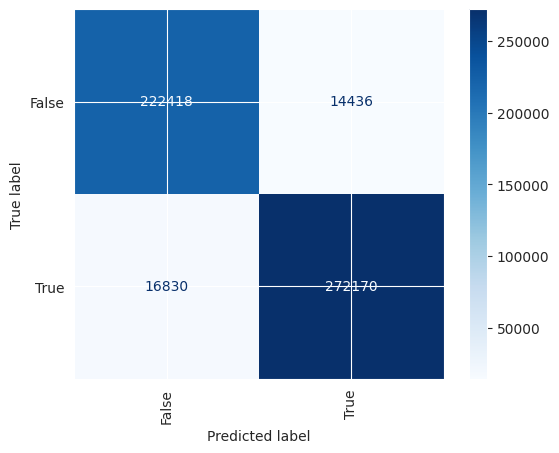

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_log_reg, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)

# Saving the plot
plot_path = '../eda_charts/logistic_regression_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [15]:
import joblib
# Save the model to a file
joblib.dump(log_reg, '../models/logistic_regression_model.joblib')

['../models/logistic_regression_model.joblib']

In [16]:
# # Load the model from a file
# loaded_log_reg = joblib.load('logistic_regression_model.joblib')

# # Use the loaded model to make predictions
# y_pred_log_reg_loaded = loaded_log_reg.predict(X_test)

#### 2. Random Forest 

In [17]:
# random forest 
rf = RandomForestClassifier(random_state=142)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [18]:
# Model Evaluation for Random Forest
print("\nRandom Forest:")

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])}")


Random Forest:
Accuracy: 0.9994960578411498
Precision: 1.0
Recall: 0.999083044982699
F1 Score: 0.9995413121933066


ROC-AUC Score: 0.999999996859058


In [19]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_rf))
print("Classification report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[236854      0]
 [   265 288735]]


Classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    236854
        True       1.00      1.00      1.00    289000

    accuracy                           1.00    525854
   macro avg       1.00      1.00      1.00    525854
weighted avg       1.00      1.00      1.00    525854



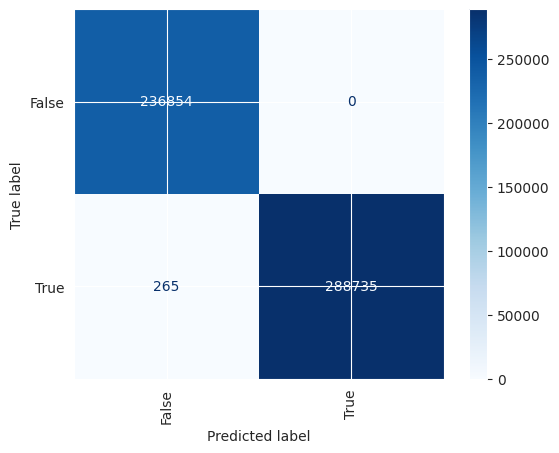

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)

# Saving the plot
plot_path = '../eda_charts/random_forest_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [21]:
# Save the model to a file
joblib.dump(rf, '../models/random_forest_model.joblib')

['../models/random_forest_model.joblib']

#### 3. Support Vector Machine (SVM)

In [ ]:
# support vector machine

svm = SVC(random_state=142, probability=True)
svm.fit(X_train, y_train)

y_train_svm = svm.predict(X_test)

In [ ]:
# Model Evaluation for SVM
print("\nSupport Vector Machine (SVM):")

print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm)}")
print(f"Recall: {recall_score(y_test, y_pred_svm)}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])}")

In [ ]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_svm))
print("Classification report:\n", classification_report(y_test, y_pred_svm))

In [ ]:
# Save the model to a file
joblib.dump(log_reg, 'logistic_regression_model.joblib')

#### 4. Gradient Boosting Machine (eg we'll use XGBoost)

In [22]:
# xg boost 
xgb = XGBClassifier(random_state=142)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [23]:
# Model Evaluation for XGBoost
print("\nGradient Boosting Machine (XGBoost):")

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])}")


Gradient Boosting Machine (XGBoost):
Accuracy: 0.9997261597325493
Precision: 1.0
Recall: 0.9995017301038063
F1 Score: 0.9997508029682135


ROC-AUC Score: 0.9999956831918093


In [33]:
# Model Evaluation for XGBoost
print("\nGradient Boosting Machine (XGBoost):")

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])}")

Confusion Matrix:
[[346959      0]
 [   167 348154]]
Classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    346959
        True       1.00      1.00      1.00    348321

    accuracy                           1.00    695280
   macro avg       1.00      1.00      1.00    695280
weighted avg       1.00      1.00      1.00    695280



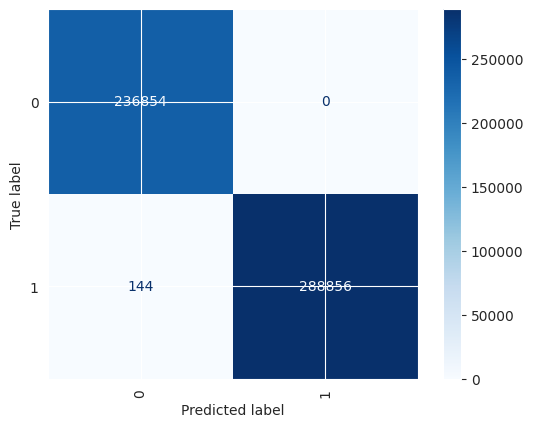

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=90)

# Saving the plot
plot_path = '../eda_charts/xgboost_confusion_matrix.png'
plt.savefig(plot_path)

plt.show()

In [26]:
# Save the model to a file
joblib.dump(xgb, '../models/xgboost_model.joblib')

['../models/xgboost_model.joblib']

### Final Model test using the test Data

In [36]:
delay_instance = {
    "airline": 15,
    "airline_dot": 15,
    "airline_code": 15,
    "dot_code": 19393,
    "fl_number": 665,
    "origin": 93,
    "origin_city": 82,
    "dest": 257,
    "dest_city": 251,
    "crs_dep_time": 1010,
    "dep_time": 1237,
    "dep_delay": 147.0,
    "taxi_out": 15.0,
    "wheels_off": 1252,
    "wheels_on": 1328,
    "taxi_in": 3.0,
    "crs_arr_time": 1110,
    "arr_time": 1331,
    "arr_delay": 141.0,
    "cancelled": False,
    "diverted": False,
    "crs_elapsed_time": 60.0,
    "elapsed_time": 54.0,
    "air_time": 36.0,
    "distance": 181.0,
    "delay_due_carrier": 141.0,
    "delay_due_weather": 0.0,
    "delay_due_nas": 0.0,
    "delay_due_security": 0.0,
    "delay_due_late_aircraft": 0.0,
    "day": 31,
    "month": 7,
    "day_of_week": 2,
}

In [31]:
# final model test 
import pandas as pd
from joblib import load
from sklearn.preprocessing import LabelEncoder

# Load the trained XGBoost model
try:
    xgb_model = load('../models/xgboost_model.joblib')
except FileNotFoundError:
    raise FileNotFoundError("The model file was not found. Please check the path.")

# Define the input data (using the sample data from the DataFrame)
sample_input = {
    'airline': 17,
    'airline_dot': 17,
    'airline_code': 14,
    'dot_code': 19977,
    'fl_number': 1562,
    'origin': 131,
    'origin_city': '118',
    'dest': 123,
    'dest_city': '240',
    'crs_dep_time': 1155,
    'dep_time': 1151,
    'dep_delay': 0.0,
    'taxi_out': 19.0,
    'wheels_off': 1210,
    'wheels_on': 1443,
    'taxi_in': 4.0,
    'crs_arr_time': 1501,
    'arr_time': 1447,
    'arr_delay': 0.0,
    'cancelled': False,
    'diverted': False,
    'crs_elapsed_time': 186.0,
    'elapsed_time': 176.0,
    'air_time': 153.0,
    'distance': 1065.0,
    'delay_due_carrier': 0.0,
    'delay_due_weather': 0.0,
    'delay_due_nas': 0.0,
    'delay_due_security': 0.0,
    'delay_due_late_aircraft': 0.0,
    'day': 9,
    'month': 1,
    'day_of_week': 2,
}

# Convert the input data to a DataFrame for consistency with model input expectations
input_df = pd.DataFrame([sample_input])

# Encode the categorical columns
def encode_categorical_columns(df: pd.DataFrame) -> pd.DataFrame:
    df_encoded = df.copy()
    categorical_columns = df_encoded.select_dtypes(include=['category', 'object']).columns

    for col in categorical_columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

    return df_encoded

# Encode the input data
encoded_input_df = encode_categorical_columns(input_df)

# Define the mapping from numeric prediction to label
prediction_mapping = {0: 'No delay', 1: 'Delay'}

# Predict the class using the XGBoost model
try:
    numeric_prediction = xgb_model.predict(encoded_input_df)[0]
    label_prediction = prediction_mapping.get(numeric_prediction, "Unknown")
    print(f"Predicted class: {label_prediction}")
except Exception as e:
    print(f"An error occurred during prediction: {e}")

Predicted class: Delay


In [32]:
# final model test 
import pandas as pd
from joblib import load
from sklearn.preprocessing import LabelEncoder

# Load the trained Random Forest model
try:
    rf_model = load('../models/random_forest_model.joblib')
except FileNotFoundError:
    raise FileNotFoundError("The model file was not found. Please check the path.")

# Define the input data (using the sample data from the DataFrame)
sample_input = {
    'airline': 17,
    'airline_dot': 17,
    'airline_code': 14,
    'dot_code': 19977,
    'fl_number': 1562,
    'origin': 131,
    'origin_city': '118',
    'dest': 123,
    'dest_city': '240',
    'crs_dep_time': 1155,
    'dep_time': 1151,
    'dep_delay': -4.0,
    'taxi_out': 19.0,
    'wheels_off': 1210,
    'wheels_on': 1443,
    'taxi_in': 4.0,
    'crs_arr_time': 1501,
    'arr_time': 1447,
    'arr_delay': -14.0,
    'cancelled': False,
    'diverted': False,
    'crs_elapsed_time': 186.0,
    'elapsed_time': 176.0,
    'air_time': 153.0,
    'distance': 1065.0,
    'delay_due_carrier': 0.0,
    'delay_due_weather': 0.0,
    'delay_due_nas': 0.0,
    'delay_due_security': 0.0,
    'delay_due_late_aircraft': 0.0,
    'day': 9,
    'month': 1,
    'day_of_week': 2,
    # 'year': 2019
}

# Convert the input data to a DataFrame for consistency with model input expectations
input_df = pd.DataFrame([sample_input])

# Encode the categorical columns
def encode_categorical_columns(df: pd.DataFrame) -> pd.DataFrame:
    df_encoded = df.copy()
    categorical_columns = df_encoded.select_dtypes(include=['category', 'object']).columns

    for col in categorical_columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

    return df_encoded

# Encode the input data
encoded_input_df = encode_categorical_columns(input_df)

# Define the mapping from numeric prediction to label
prediction_mapping = {0: 'No delay', 1: 'Delay'}

# Predict the class using the Random Forest model
try:
    numeric_prediction = rf_model.predict(encoded_input_df)[0]
    label_prediction = prediction_mapping.get(numeric_prediction, "Unknown")
    print(f"Predicted class: {label_prediction}")
except Exception as e:
    print(f"An error occurred during prediction: {e}")

Predicted class: Delay


### Conclusion

In [ ]:
# conclusion 